In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
D = 2
s = 4  # separation 
mu1 =  np.array([0, 0])
mu2 = np.array([s, s])
mu3 = np.array([0, s])

N = 900 # number of samples
X = np.zeros((N, D))
X[:300, :] = np.random.randn(300, D) + mu1
X[300:600, :] = np.random.randn(300, D) + mu2
X[600:, :] = np.random.randn(300, D) + mu3

Data without clustering

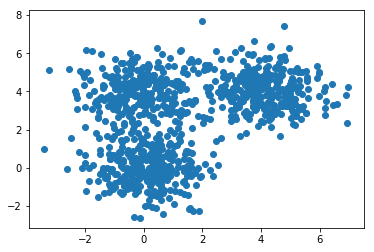

In [3]:
plt.scatter(X[:, 0], X[:, 1])

In [14]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)

def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost += R[n, k] * d(M[k], X[n])

def plot_k_means(X, K, max_iter=20, beta=1.0):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.ones((N, K)) / K
    
    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]
    
    grid_width = 5
    grid_height = max_iter / grid_width
    random_colors = np.random.random((K, 3))
    plt.figure()
    
    costs = np.zeros(max_iter)
    for i in range(max_iter):
        colors = R.dot(random_colors)
        plt.subplot(grid_width, grid_height, i + 1)
        plt.scatter(X[:, 0], X[:, 1], c=colors)
        
        # step 1: determine assignments / responsibilities
        for k in range(K):
            for n in range(N):
                R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum( np.exp(-beta*d(M[j], X[n])) for j in range(K) )
        # step 2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()
        
        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 1e-5:
                break
        plt.show()

/home/opp/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


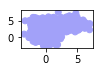

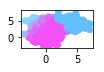

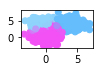

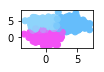

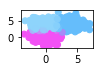

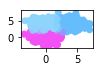

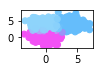

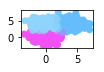

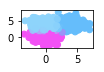

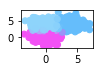

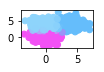

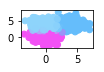

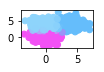

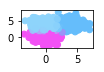

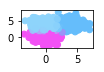

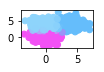

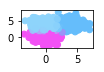

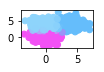

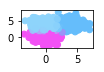

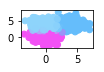

In [15]:
plot_k_means(X, K=3)

Bad K (K=5)

/home/opp/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


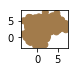

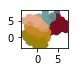

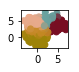

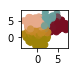

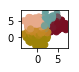

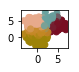

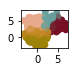

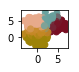

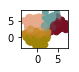

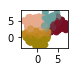

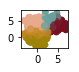

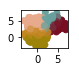

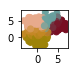

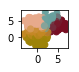

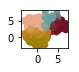

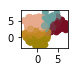

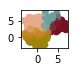

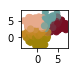

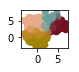

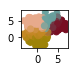

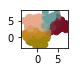

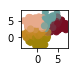

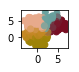

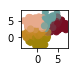

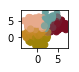

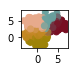

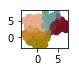

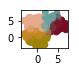

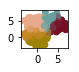

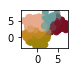

In [16]:
plot_k_means(X, K=5, max_iter=30)

What happen if we change beta

/home/opp/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


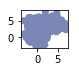

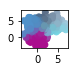

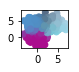

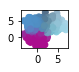

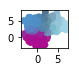

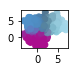

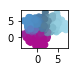

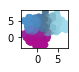

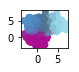

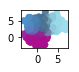

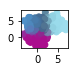

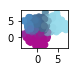

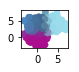

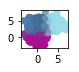

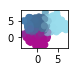

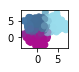

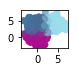

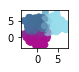

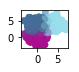

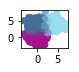

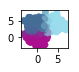

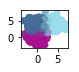

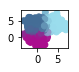

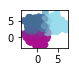

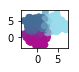

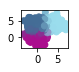

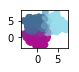

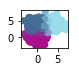

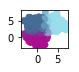

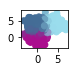

In [17]:
plot_k_means(X, K=5, max_iter=30, beta=0.3)

### When K-means can failed

In [18]:
def donut():
    N = 1000
    D = 2

    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    return X


Donut

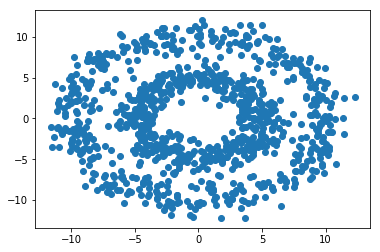

In [20]:
X = donut()
plt.scatter(X[:, 0], X[:, 1])

/home/opp/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


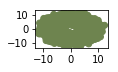

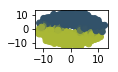

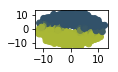

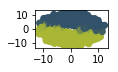

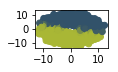

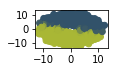

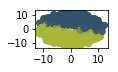

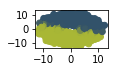

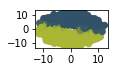

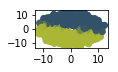

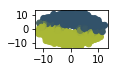

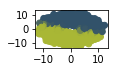

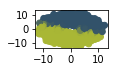

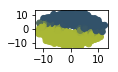

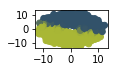

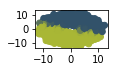

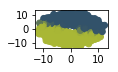

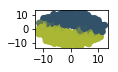

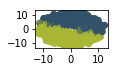

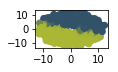

In [21]:
plot_k_means(X, 2, beta=0.1)

Elongated clusters

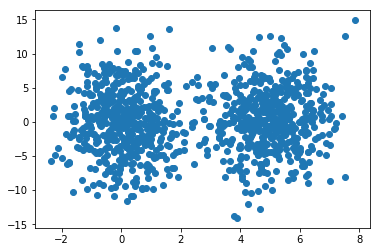

In [22]:
X = np.zeros((1000, 2))
X[:500,:] = np.random.multivariate_normal([0, 0], [[1, 0], [0, 20]], 500)
X[500:,:] = np.random.multivariate_normal([5, 0], [[1, 0], [0, 20]], 500)
plt.scatter(X[:, 0], X[:, 1])

/home/opp/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


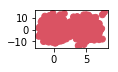

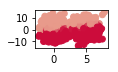

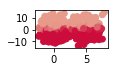

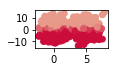

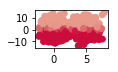

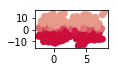

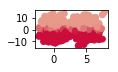

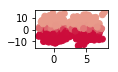

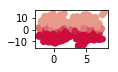

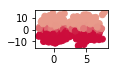

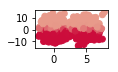

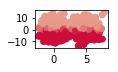

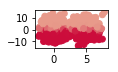

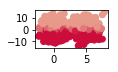

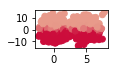

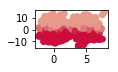

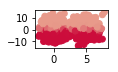

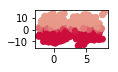

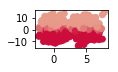

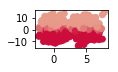

In [23]:
plot_k_means(X, 2, beta=0.1)

Different density

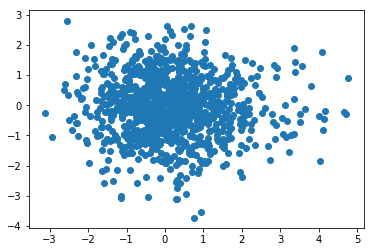

In [24]:
X = np.zeros((1000, 2))
X[:950,:] = np.array([0,0]) + np.random.randn(950, 2)
X[950:,:] = np.array([3,0]) + np.random.randn(50, 2)
plt.scatter(X[:, 0], X[:, 1])

/home/opp/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


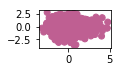

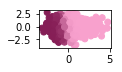

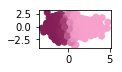

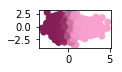

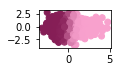

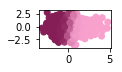

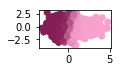

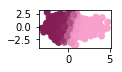

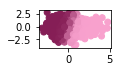

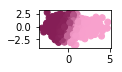

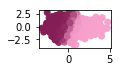

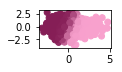

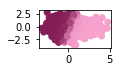

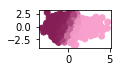

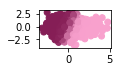

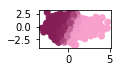

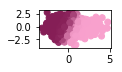

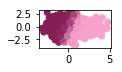

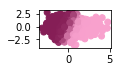

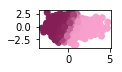

In [25]:
plot_k_means(X, 2)